In [1]:
import pandas as pd
import numpy as np
import feature_engine 
import pickle
import matplotlib.pyplot as plt
import plotly.express as px



In [1]:
ENCODED_DATA_PATH = '../data/processed/1_encoded_df.pkl'
TARGET_COL = 'DevType'
CLUSTERED_DF_PATH = '../data/processed/1_clustered_skills_df.pkl'
CLEANED_DF_PATH = '../data/processed/1_cleaned_df.pkl'

In [3]:
encoded_df = pd.read_pickle(ENCODED_DATA_PATH)
encoded_df.head()

LanguageHaveWorkedWith                                                      \
                     APL Assembly Bash/Shell  C C# C++ COBOL Clojure Crystal   
0                      0        0          0  0  0   1     0       0       0   
1                      0        0          0  0  0   0     0       0       0   
2                      0        1          0  1  0   0     0       0       0   
3                      0        0          0  0  0   0     0       0       0   
4                      0        0          1  0  0   0     0       0       0   

        ...        DevType                                                 \
  Dart  ... Engineer, data Engineer, site reliability Engineering manager   
0    0  ...              0                          0                   0   
1    0  ...              0                          0                   0   
2    0  ...              0                          0                   0   
3    0  ...              0                          0                   0   
4    0  ...              1                          0                   0   

                                                                           \
  Marketing or sales professional Other (please specify): Product manager   
0                               0                       0               0   
1                               0                       0               0   
2                               0                       0               0   
3                               0                       0               0   
4                               0                       1               0   

                                                                               
  Scientist Senior Executive (C-Suite, VP, etc.) Student System administrator  
0         0                                    0       0                    0  
1         0                                    0       0                    0  
2         0                                    0       0                    0  
3         0                                    0       0                    0  
4         0                                    0       0                    0  

[5 rows x 150 columns]

In [4]:
grouped_skills_df = pd.read_pickle(CLUSTERED_DF_PATH)
grouped_skills_df.head()

,skills_group_0,skills_group_1,skills_group_10,skills_group_11,skills_group_12,skills_group_13,skills_group_14,skills_group_15,skills_group_16,skills_group_17,...,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Other (please specify):,Product manager,Scientist,"Senior Executive (C-Suite, VP, etc.)",Student,System administrator
0,1,0,0,0,1,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,1,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,5,0,0,2,0,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,4,0,0,1,0,0,2,0,2,...,1,0,0,0,1,0,0,0,0,0


---
### Drop irrelevant job titles

In [5]:
encoded_df.loc[:,'DevType'].columns

Index(['Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Other (please specify):',
       'Product manager', 'Scientist', 'Senior Executive (C-Suite, VP, etc.)',
       'Student', 'System administrator'],
      dtype='object')

In [6]:
EXCULDE_ROLES = [
    'Other (please specify):',
    'Student',
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior Executive (C-Suite, VP, etc.)',
    'Product manager',
    'Engineer, site reliability']
for role in EXCULDE_ROLES:
    grouped_skills_df = grouped_skills_df.drop(role , axis=1)
    encoded_df = encoded_df.drop(('DevType',role),axis=1)
    
    


---
### Filter observations

<Axes: ylabel='Count'>

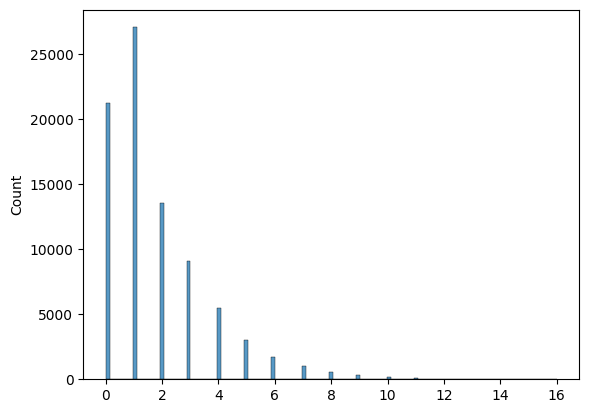

In [15]:
import seaborn as sns
roles_freq = encoded_df.loc[:,'DevType'].sum(axis=1)
sns.histplot(roles_freq)

<Axes: ylabel='Count'>

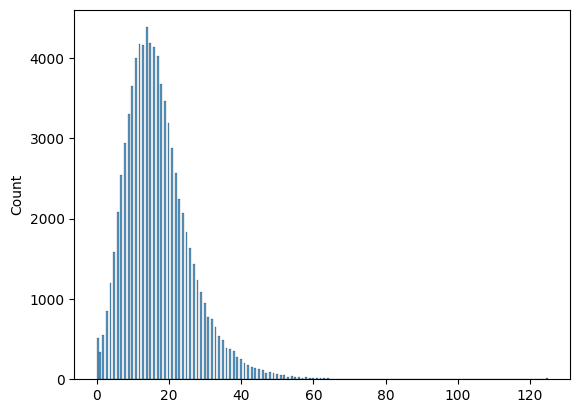

In [22]:
tech_skills_freq = encoded_df.drop('DevType',axis=1).sum(axis=1)
sns.histplot(tech_skills_freq)

Assuming reasonable range of 
- Number of job title: [1,3]
- Number of Skills:  [3,30]

In [26]:
ROLES_RANGE = [1,3]
TECH_RANGE  = [3,30]

In [42]:
job_mask = (roles_freq >= ROLES_RANGE[0]) & (roles_freq <= ROLES_RANGE[1])
skills_mask = (tech_skills_freq >= TECH_RANGE[0]) & (tech_skills_freq <= TECH_RANGE[1])
mask = job_mask &  skills_mask
df = grouped_skills_df.loc[mask,:].copy()


---
### Export data

In [45]:
df.to_pickle(CLEANED_DF_PATH)